# Assignment-1

## Name: Swaroop Srisailam
### Roll No.:22239

### Importing the dependencies

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff
from sympy.matrices import Matrix, Inverse, Transpose
from mpl_toolkits import mplot3d
plt.style.use('seaborn')

## Newton Raphson Method

In [2]:
def grad_f():
    x, y = symbols('x y', real = True)
    f= x**3+y**2+8*x*y
    grad_f_trans = [diff(f,x),diff(f,y)]
    return grad_f_trans
def jacobi():        #takes grad_f_trans as an input
    gf = grad_f()
    x, y = symbols('x y', real = True)
    j_matrix = [[diff(gf[0],x), diff(gf[0],y)],[diff(gf[1],x), diff(gf[1],y)]]
    return j_matrix



def N_R_Method():    #takes j_matrix as an input
    x0 = Matrix([0,0])
    gf_trans = grad_f()
    jacobi_M = jacobi()
    x, y = symbols('x y', real = True)
    jacobi_M = [[jacobi_M[0][0].subs(x, x0[0]).subs(y, x0[1]), jacobi_M[0][1].subs(x,x0[0]).subs(y,x0[1])],[jacobi_M[1][0].subs(x,x0[0]).subs(y,x0[1]),jacobi_M[1][1].subs(x,x0[0]).subs(y,x0[1])]]
    jacobi_M = Matrix(jacobi_M)
    jacobi_M_inv = Inverse(jacobi_M)
    g_x0 = [gf_trans[0].subs(x,x0[0]).subs(y,x0[1]), gf_trans[1].subs(x,x0[0]).subs(y,x0[1])]
    g_x0 = Matrix(g_x0)
    for i in range(0,50):
        x1 = x0 - jacobi_M_inv * g_x0
        x0 = x1
    return x0
N_R_Method()

Matrix([
[0],
[0]])

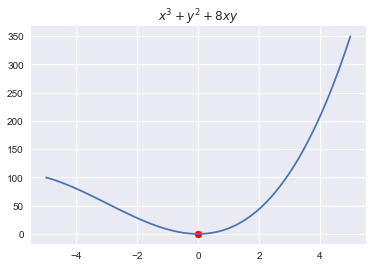

In [3]:
def f(x,y):
    return x**3+y**2+8*x*y
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
plt.plot(x,f(x,y))
plt.scatter(0,f(0,0),color='r')
plt.title('$ x^3 +y^2+8xy$')
plt.show()

### The Red Point is the critical point of the equation $ x^3 +y^3+3xy$

## Gradient Descent Algorithm

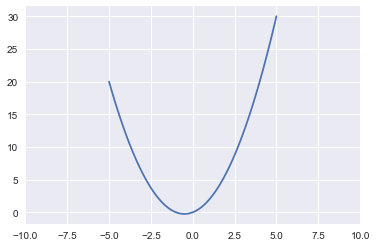

In [4]:
def obj(x): #Object function
    return x**2+x

x = np.linspace(-5,5,100)
plt.plot(x,obj(x))
plt.xlim(-10, 10)
plt.show()

In [5]:
def dx(x): #derivative of the function
    return x*2.0+1.0


 --->0 f([0.43015471]) = 0.61519
 --->1 f([0.24412377]) = 0.30372
 --->2 f([0.09529901]) = 0.10438
 --->3 f([-0.02376079]) = -0.02320
 --->4 f([-0.11900863]) = -0.10485
 --->5 f([-0.1952069]) = -0.15710
 --->6 f([-0.25616552]) = -0.19054
 --->7 f([-0.30493242]) = -0.21195
 --->8 f([-0.34394594]) = -0.22565
 --->9 f([-0.37515675]) = -0.23441
 --->10 f([-0.4001254]) = -0.24003
 --->11 f([-0.42010032]) = -0.24362
 --->12 f([-0.43608026]) = -0.24591
 --->13 f([-0.4488642]) = -0.24739
 --->14 f([-0.45909136]) = -0.24833
 --->15 f([-0.46727309]) = -0.24893
 --->16 f([-0.47381847]) = -0.24931
 --->17 f([-0.47905478]) = -0.24956
 --->18 f([-0.48324382]) = -0.24972
 --->19 f([-0.48659506]) = -0.24982
 --->20 f([-0.48927605]) = -0.24988
 --->21 f([-0.49142084]) = -0.24993
 --->22 f([-0.49313667]) = -0.24995
 --->23 f([-0.49450934]) = -0.24997
 --->24 f([-0.49560747]) = -0.24998
 --->25 f([-0.49648597]) = -0.24999
 --->26 f([-0.49718878]) = -0.24999
 --->27 f([-0.49775102]) = -0.24999
 --->28 f([

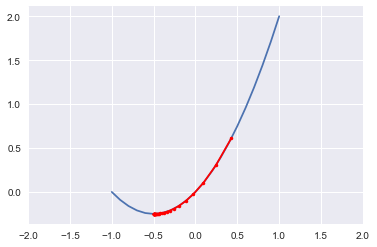

In [7]:
def gradient_descent(objective, derivative, bounds, n_it, step_size):
   
    solutions, scores = list(), list()
   
    solution = bounds[:, 0] +np.random.rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    
    for i in range(n_it):   #running the gradient descent
        gradient = dx(solution)
        solution = solution - step_size * gradient
        y = objective(solution)
        solutions.append(solution)
        scores.append(y)
        print(' --->%d f(%s) = %.5f' % (i, solution, y)) #the progress
    return [solutions, scores]
 

bounds = np.asarray([[-1.0, 1.0]]) #range for input
                                            
it = 30 #total iterations

lr = 0.1  #Learning rate
solutions, scores = gradient_descent(obj, dx, bounds, it, lr)

x = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)

y = obj(x)

plt.plot(x, y)  #plotting the eqation
plt.plot(solutions, scores, '.-', color='red') #plotting the path 
plt.xlim(-2,2)
plt.show() #displaying the plot

## Golden Section 

In [6]:
def f(x):  #Objective Function
    return x**2
        
it = int(input("Enter The number Of Iterations:"))
xl = int(input("enter xl value :"))
xr = int(input("enter xr value :"))
err = float(input("enter error value :"))

while(it):   #n iterations it loops
    if (err < abs(xl-xr)): #if error is less than the differemce
        x1 = xr - 0.618 * (xr-xl)
        x2 = xl + 0.618 * (xr-xl)
    
        f1 = float(f(x1))
        f2 = float(f(x2))
    
        if f1>f2:
            xr = x2
        elif f1<f2:
            xl = x1
        else:
            xl = x1
            xr = x2
        
        it = it-1
        print("iterations = ",it)
        print("xl = ",xl)
        print("xr = ",xr)
    else:
        break
    
print("After Golden Section Method:\n")
fle = f(x1)
fri = f(x2)

if fle>fri:
    print("The Extreme Point = \n",x1)
    print("f(x) at Extreme Point = \n",fl)
    
else:
    print("The Extreme Point = \n",x2)
    print("f(x) at Extreme Point = \n",fr)

Enter The number Of Iterations:50
enter xl value :-1
enter xr value :1
enter error value :.09
iterations =  49
xl =  -0.236
xr =  0.236
iterations =  48
xl =  -0.05569599999999997
xr =  0.05569599999999997
iterations =  47
xl =  -0.013144255999999993
xr =  0.013144255999999993
After Golden Section Method:

The Extreme Point = 
 0.013144255999999993
f(x) at Extreme Point = 
 0.00017277146579353583
